# Dataset
The dataset contains signs and symptoms data of newly diabetic or would be diabetic patient. It is to be used for early stage diabetes risk prediction.

Dataset : https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset

# About Dataset
Predict whether individuals are at risk of developing diabetes or not based on their signs and symptoms, using binary classification.

# Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [14]:
#Import data
df = pd.read_csv('C:\\Users\\JEBINA P\\Downloads\\dataset_diabetes.csv')

In [15]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [16]:
df.shape

(520, 17)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [19]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [10]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,50,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Negative
1,46,Female,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No,No,Positive
2,39,Female,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Positive
3,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
4,43,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive


In [11]:
df.duplicated().sum()

269

In [12]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

# Column description

Age: Represents the age of the patient, ranging from 20 to 65 years.

Sex: Represents the gender of the person, categorized as Male or Female.

Polyuria, Polydipsia, Sudden Weight Loss, Weakness, Polyphagia, Genital Thrush, Visual Blurring, Itching, Irritability, Delayed Healing, Partial Paresis, Muscle Stiffness, Alopecia, Obesity: These are binary indicators that represent whether specific signs and symptoms are observed in patients. Each of these variables can have a value of either "yes" or "no."

Class: This is the target variable. It indicates whether the person tests positive or negative for diabetes. This binary classification outcome will guide the predictive modeling process.

# Analysis
There are 520 rows and 17 columns, no null values in the dataset.
and there are 269 duplicates in the data.
Except age column, all other columns are categorical.

In [65]:
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(6)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
212,18,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
147,38,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1
169,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
370,30,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0
385,23,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1
104,11,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1


# Data Preprocessing
Converting categorical variables into numerical

In [66]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.sample(6)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
403,0.62,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
397,0.22,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
376,0.22,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
158,0.22,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
98,0.48,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


# Dropping duplicates

In [67]:
df.drop_duplicates(inplace=True)
df.shape

(251, 17)

# Visualiazation

C:\Users\JEBINA P\AppData\Local\Temp\ipykernel_9068\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

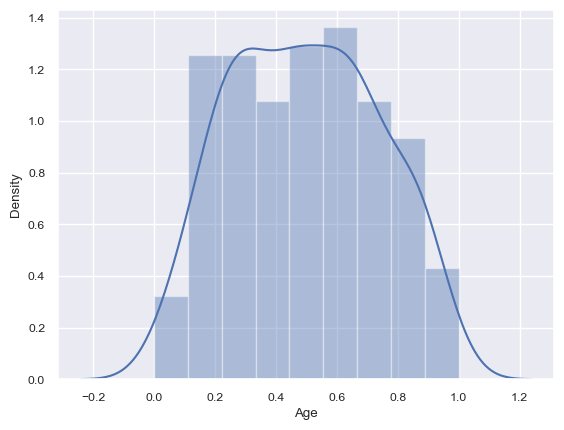

In [68]:
sns.distplot(df['Age'])

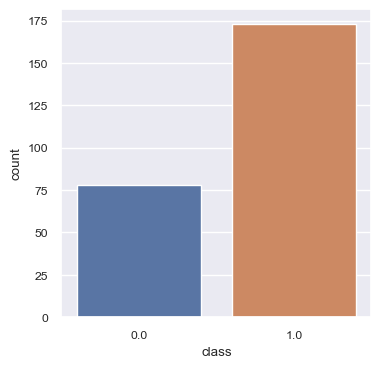

In [69]:
# Set the font scale
sns.set(font_scale=0.8)

# Create the count plot
plt.figure(figsize=(4, 4))
sns.countplot(x='class', data=df)

# Show the plot
plt.show()


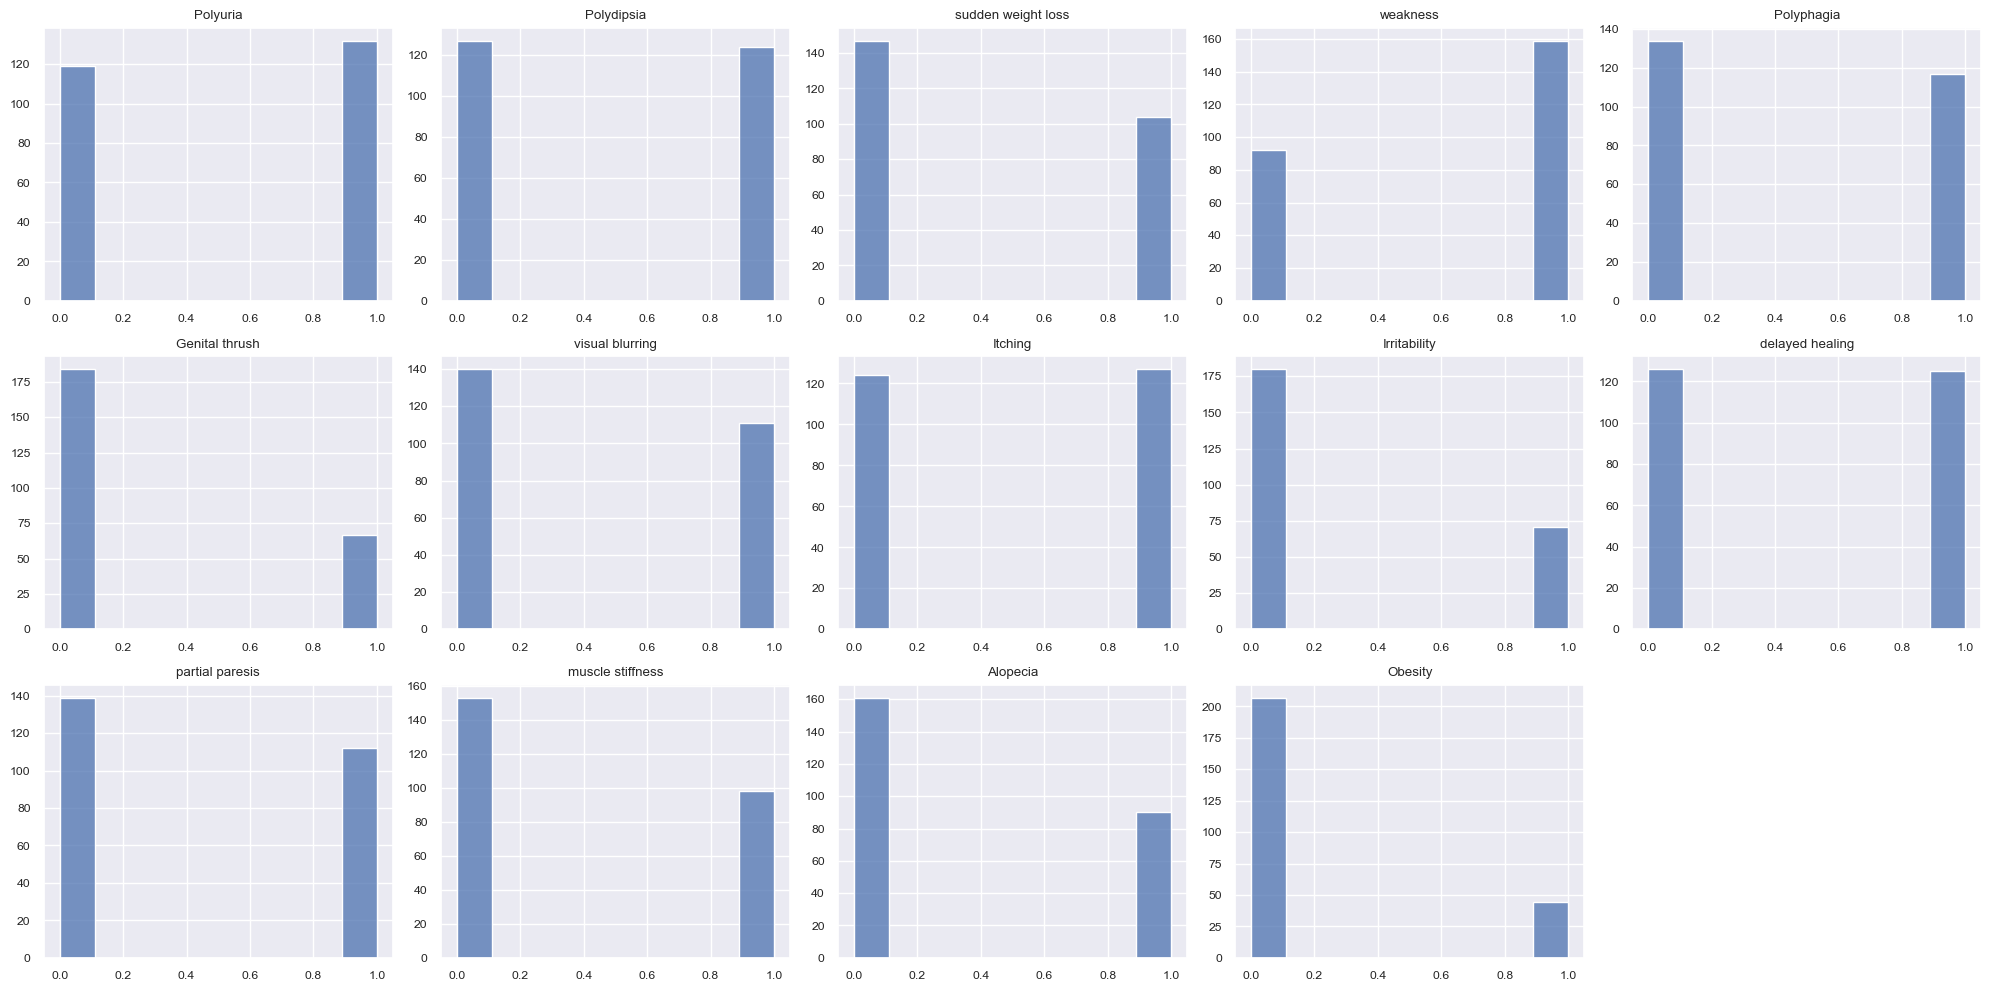

In [70]:
col_list = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

plt.figure(figsize=(20, 10))

for i in range(14):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col_list[i]])
    plt.title(col_list[i])  # Set subplot title
    plt.xlabel("")  # Clear x-axis label
    plt.ylabel("")  # Clear y-axis label

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


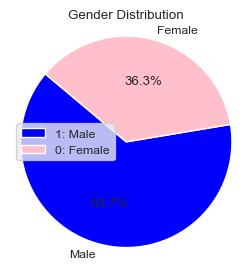

In [71]:
#There are more patients who have tested positive for the disease.
plt.figure(figsize=(3, 3))

# Create a pie chart for the 'Gender' column
gender_counts = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['blue', 'pink']

plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a legend with custom labels
legend_labels = ['1: Male', '0: Female']
plt.legend(legend_labels, loc='center left')

# Set plot title
plt.title('Gender Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


<Axes: >

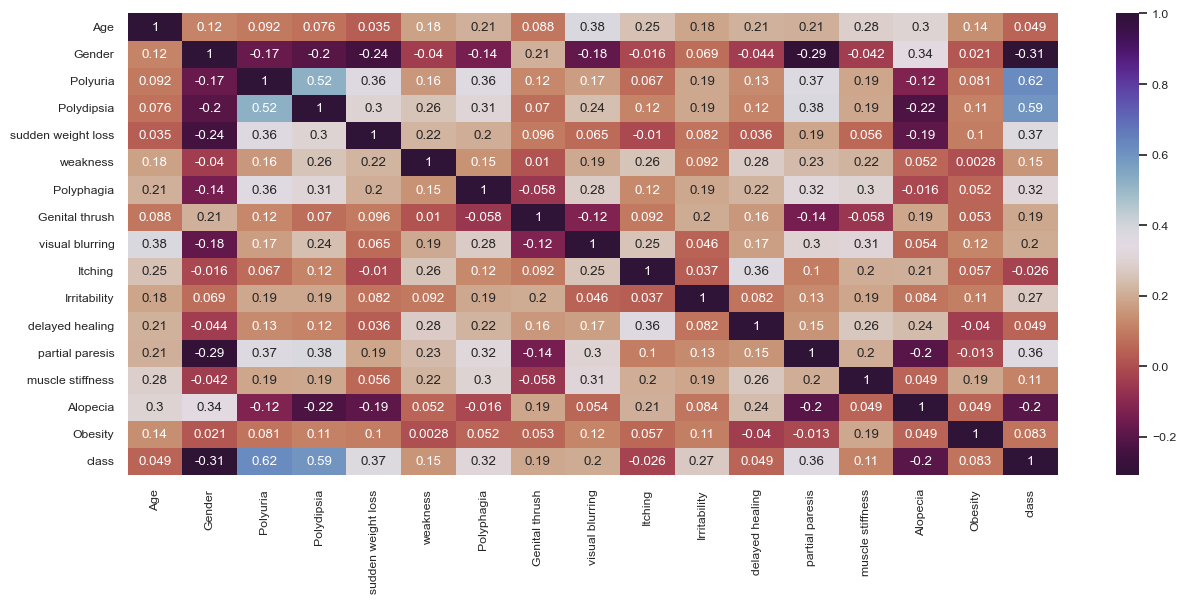

In [72]:
plt.figure(figsize=(15,6))

sns.heatmap(df.corr(), annot=True, cmap='twilight_shifted_r')

In [73]:
df.corr()['class'].sort_values(ascending=False)

class                 1.000000
Polyuria              0.620992
Polydipsia            0.594615
sudden weight loss    0.372554
partial paresis       0.360288
Polyphagia            0.316808
Irritability          0.268806
visual blurring       0.199228
Genital thrush        0.191117
weakness              0.150254
muscle stiffness      0.113890
Obesity               0.083167
Age                   0.049359
delayed healing       0.048976
Itching              -0.026411
Alopecia             -0.198024
Gender               -0.309413
Name: class, dtype: float64

# Building Model: Random Forest(RF)

In [74]:
# Define your features and target variables
x = df.iloc[:, :-1]
y = df['class']

In [75]:
# Feature scaling using MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(x)

In [76]:
# Splitting data into training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.35, random_state=21)

In [77]:
# Create a Random Forest Classifier instance
rf_classifier = RandomForestClassifier(random_state=21)

In [78]:
# Define the parameter grid for hyperparameter tuning
rf_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [79]:
# Perform GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=rf_parameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    verbose=1
)

In [ ]:
# Fit the grid search to the training data
rf_grid_search.fit(xtrain, ytrain)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [ ]:
# Print the best parameters and best score
print('Best parameters are:', rf_grid_search.best_params_)
print('Score of the model is:', rf_grid_search.best_score_)

In [ ]:
# Build Random Forest model using best parameters
rf_classifier_best = RandomForestClassifier(
    n_estimators=rf_grid_search.best_params_['n_estimators'],
    max_depth=rf_grid_search.best_params_['max_depth'],
    min_samples_split=rf_grid_search.best_params_['min_samples_split'],
    min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
    random_state=21
)

In [ ]:
# Fit the data to the model
rf_classifier_best.fit(xtrain, ytrain)

In [43]:
# Make predictions
ypred_rf = rf_classifier_best.predict(xtest)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate the model
print('Accuracy of the Random Forest model is:',
      round(accuracy_score(ytest, ypred_rf) * 100, 2), 'percent.')
print('--------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(ytest, ypred_rf))
print('--------------------------------------------')
print('Classification report: \n', classification_report(ytest, ypred_rf))

Accuracy of the Random Forest model is: 93.18 percent.
--------------------------------------------
Confusion matrix: 
 [[25  4]
 [ 2 57]]
--------------------------------------------
Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89        29
         1.0       0.93      0.97      0.95        59

    accuracy                           0.93        88
   macro avg       0.93      0.91      0.92        88
weighted avg       0.93      0.93      0.93        88



# The random Forest has 93% accuracy